<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Arya Jalali <br>
   **Student ID**: 98105665 <br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

## Importing the necessary libraries

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import pandas as pd  
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# Model

### A linear regression model with 3 different type of regularizations.

## Parameters:

- ### cost_deriv: A callable that calculates the gradient at each step for our model (ridge_deriv, lasso_deriv, elastic_deriv)
- ### alpha: Regularization coefficient  ($L = ||X \theta  - y||_2 + \alpha ||\Theta||_2$)
- ### learning rate: A hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.
- ### l1: L1 Ratio for elastic regression loss ($L = MSE(y,y_pred) + \frac{\alpha}{2}.(1 - L1)||\Theta||_2+ \alpha.L1 ||\Theta||_1$ 
- ### total_iter: Number of iterations to perform for SGD.

### l1 parameter has no effect on ridge and lasso models.

## Methods:

- ### forward: Calculates and returns the result of our model for a data matrix.
- ### fit: Drive function for learning $\Theta$'s weights.
- ### score: Calculates and returns $R2$ and $MSE$ metrics as a tuple.

In [157]:
class RegressionModel:
  def __init__(self,cost_deriv = None,alpha = 1.0,learning_rate = 0.01, l1 = 0.5, total_iter = 10000):
    self.alpha = alpha
    self.learning_rate = learning_rate
    self.total_iter = total_iter
    self.cost_deriv = cost_deriv
    self.l1 = l1

  def forward(self,X):
    return X @ self.theta

  def fit(self,X_train, y_train):
    X_train = normalize(X_train)
    y_train = np.array([y_train]).T
    (h,w) = X_train.shape
    self.theta = np.zeros((w + 1,1))
    X_train = np.hstack((np.ones([h,1]),X_train))
    for i in range(self.total_iter):
      self.theta = self.theta - self.learning_rate * self.cost_deriv(self,X_train,y_train)

  def score(self, X, y):
    X = normalize(X)
    y = np.array([y]).T
    (h,_) = X.shape
    X = np.hstack((np.ones([h,1]),X))
    y_pred = self.forward(X)
    v = ((y - y.mean()) ** 2).sum()
    u = ((y_pred - y) ** 2).sum()
    return (1 - u/v, ((y - y_pred)**2).sum() / y.size)

# Gradient of different loss functions (Ridge, Lasso, Elastic) to be used as parameter for our model.

In [158]:
def ridge_deriv(model, X, y):
  y_pred = model.forward(X)
  derv = (-2/y.size) * X.T @(y - y_pred) + model.alpha * model.theta
  return derv

def lasso_deriv(model, X ,y):
  y_pred = model.forward(X)
  derv = (-2/y.size) * X.T @(y - y_pred) + model.alpha * np.sign(model.theta)
  return derv

def elastic_deriv(model, X, y):
  y_pred = model.forward(X)
  derv = (-2/y.size) * X.T @(y - y_pred) + \
  model.alpha * model.l1 * np.sign(model.theta) + \
  model.alpha * 1/2 * (1 - model.l1) * model.theta
  return derv

# Load our dataset (Boston housing dataset)
## I've chosen this dataset because of 2 reasons. Firstly, some columns of this dataset have caused controversy, these extra columns are said to have no effect on the final price, and have only been collected because racism was more accepted in the 1970's, hence the though that they could have an effect wasn't that far fetched. Whether these columns do or do not have any effect on the final price can be deduced from machine learning models (such as regression).Secondly, the target value seems to follow a normal distribution.

In [159]:
boston_dataset = datasets.load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

## Target distribution

### The target value (MEDV) appears to follow a normal distribution (it can be said it resembles more of a multimodal distribution. I finally decided on a normal distribution because of the gap in their standard deviation. 

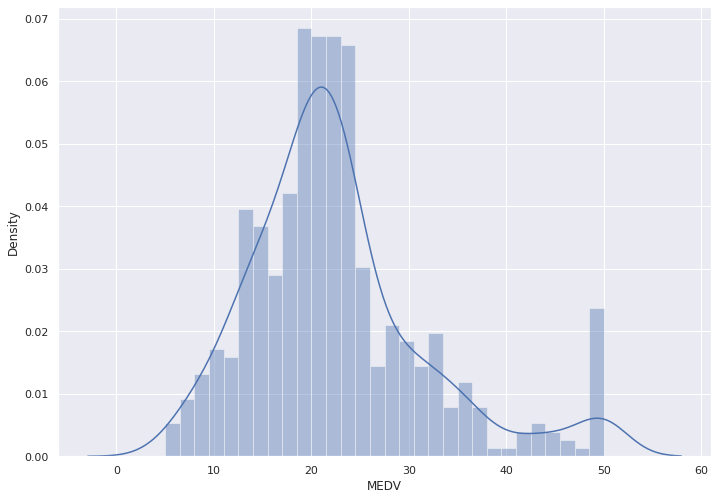

In [160]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

## Heatmap

### Correlation matrix showing the correlation coefficient between our features.

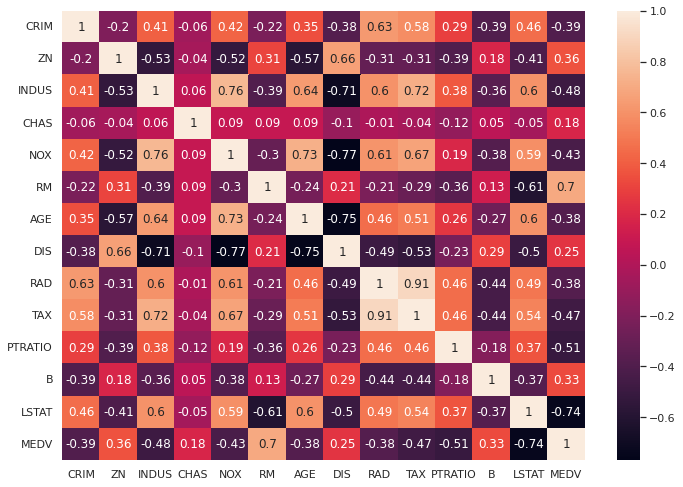

In [161]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Pairplot

# A matrix of plots showing pairwise relationships between the columns of our data (plots on the diagonal show the distribution of that column)

In [162]:
# import seaborn as sns #seaborn

# sns.pairplot(boston)

## I decided to keep the 2 most correlated columns (LSTAT, RM) with correlation coefficients of -0.74 and 0.7 respectively. 

In [163]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

## Training and testing the model

### The data is split into 80,10,10 for train,test,validation. 

### The model is trained on different hyperparameters, and the ones with the best performance on validation data are chosen to represent our final model.

### After training is done for a specific regression type, we print the $R2$ and $MSE$ metrics.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 1/9, random_state = 42)

alpha = [0.0001,0.001,0.01, 0.1, 1]
lr = [0.0001,0.001, 0.01, 0.1, 1]
l1 = [0.05,0.5,5]
functions = {
    "Ridge Regression": ridge_deriv,
    "Lasso Regression": lasso_deriv,
    "Elastic Regression": elastic_deriv}

best_score = -200
best_test_score = 0
best_parameters = None


for name,func in functions.items():
    for a in alpha:
        for l in lr:
            for ratio in l1:
                model = RegressionModel(cost_deriv =func ,alpha = a, learning_rate = l, l1 = ratio)
                model.fit(X_train,y_train)
                cur_score = model.score(X_valid,y_valid)
                if cur_score[0] > best_score:
                    best_score = cur_score[0]
                    best_test_score = model.score(X_test,y_test)
                    best_parameters = {
                        "type": name,
                        "alpha": a,
                        "learning rate": l,
                        "ratio": ratio
                    }
    print("R2 Error:",best_test_score[0], "MSE Error:", best_test_score[1])
    print(best_parameters,"\n\n")
    best_score = -200
    best_test_score = 0
    best_parameters = None

R2 Error: 0.7622247048327754 MSE Error: 14.845314520422471
{'type': 'Ridge Regression', 'alpha': 0.0001, 'learning rate': 0.1, 'ratio': 0.05} 


R2 Error: 0.7630647355315696 MSE Error: 14.792867860976035
{'type': 'Lasso Regression', 'alpha': 0.0001, 'learning rate': 0.1, 'ratio': 0.05} 


R2 Error: 0.7799718171484584 MSE Error: 13.737287448180636
{'type': 'Elastic Regression', 'alpha': 0.001, 'learning rate': 0.1, 'ratio': 5} 




# Results

## There seems to be little difference between the 3 models, but Elastic regression seems to perform better, and suffer less from overfitting.